<a href="https://colab.research.google.com/github/Sukantanath108/Pytorch_practise_DL/blob/main/make_circles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import torch
# from torch import nn 2nd option is better for clarity
import matplotlib.pyplot as plt
import seaborn
import torch.nn as nn

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
device

In [ ]:
from sklearn.datasets import make_circles
n_samples = 1000
X , y = make_circles(n_samples, noise = 0.05 , shuffle = True, random_state=49)

In [ ]:
X[:5] , y[:5]

(array([[-0.68205068, -0.75078749],
        [-0.74734679, -0.42062002],
        [-0.77214866,  0.27711586],
        [ 1.04714725, -0.01504566],
        [-0.64163579,  0.74089149]]),
 array([0, 1, 1, 0, 0]))

In [ ]:
X.shape , X.dtype , y.shape , y.dtype

((1000, 2), dtype('float64'), (1000,), dtype('int64'))

In [ ]:
df = pd.DataFrame({"X1": X[:,0],
                   "X2": X[:,1],
                  "label" : y})

In [ ]:
df.head()

,X1,X2,label
0,-0.682051,-0.750787,0
1,-0.747347,-0.420620,1
2,-0.772149,0.277116,1
3,1.047147,-0.015046,0
4,-0.641636,0.740891,0


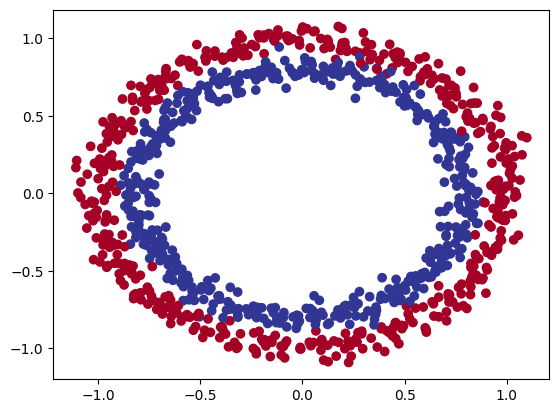

In [ ]:
%matplotlib inline
plt.scatter(x = X[:,0] , y = X[:,1], c = y , cmap = plt.cm.RdYlBu)

# c = y / assigns a color to each point based on the class/label y.

** Toy Dataset list

<h1> load_boston , load_diabetes , load_digits , load_wine , load_breast_cancer

In [ ]:
# change data to tensors

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state = 49)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [ ]:
print(X.shape[0]) # first Column X1
print(X.shape[1]) # second Column X2

1000
2


In [ ]:
class circle_classification(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features = 2,out_features=10)
    self.layer_2 = nn.Linear(in_features = 10,out_features=10)
    self.layer_3 = nn.Linear(in_features = 10,out_features=1)

  def forward(self,x): # we created our method
    return self.layer_3(self.layer_2(self.layer_1(x))) # x --> layer-1 > layer-2 > layer-3 > output

model = circle_classification().to(device)

In [ ]:
model

circle_classification(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
next(model.parameters()).device

device(type='cpu')

In [ ]:
# use sequential

model_seq = nn.Sequential(
    nn.Linear(in_features = 2,out_features=10),
    nn.Linear(in_features = 10,out_features=10),
    nn.Linear(in_features = 10,out_features=1)
).to(device)

model_seq

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

# Check that sequential does the same work for us like the class we made circle_classification

<h1> subclassing is better

In [ ]:
with torch.inference_mode():
  untrained_pred = model(X_test.to(device))
  print(f"Length of predictions {len(untrained_pred)}")
  print(f"Shape of predictions {untrained_pred.shape}")
  print(f"First 10 predictions: \n{(untrained_pred[:10])}")
  print(f"First 10 predictions round: \n{torch.round(untrained_pred[:10])}")
  print(f"First 10 labels {y_test[:10]}")


Length of predictions 200
Shape of predictions torch.Size([200, 1])
First 10 predictions: 
tensor([[-0.0282],
        [-0.0506],
        [ 0.0953],
        [ 0.0793],
        [-0.0776],
        [ 0.0870],
        [ 0.1015],
        [ 0.1072],
        [ 0.0140],
        [-0.0155]])
First 10 predictions round: 
tensor([[-0.],
        [-0.],
        [0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]])
First 10 labels tensor([1., 1., 1., 1., 0., 0., 1., 0., 0., 1.])


In [ ]:
loss_func = nn.BCEWithLogitsLoss() # combined sigmoid with BCELoss , if we use BCELoss() --> it is less stable
optimizer = torch.optim.SGD(params= model.parameters(), lr = 0.01)

Forward pass - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).
Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).

Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).


Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).


Step the optimizer (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).

In [ ]:
def accuracy_score(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
  total = y_pred.numel()
  accuracy = correct/ total
  return accuracy * 100

# training loop

Need to convert logits into prediciton probabilites. Then into prediciton label (threshold perhaps)

In [ ]:
model.eval()
with torch.inference_mode():
  y_logits = model(X_test.to(device))[:5]
y_logits

tensor([[-0.0282],
        [-0.0506],
        [ 0.0953],
        [ 0.0793],
        [-0.0776]])

In [ ]:
y_logits_np = y_logits.cpu().numpy()

In [ ]:
y_logits_np.device

'cpu'

In [ ]:
y_pred_prob  = torch.round(torch.sigmoid(y_logits))
y_pred_prob

tensor([[0.],
        [0.],
        [1.],
        [1.],
        [0.]])

In [ ]:
def boundary(x):
  result = []
  print(len(x))
  for i in range(len(x)):
    if y_pred_prob[i] > 0.5:
      result.append(1)
    else:
      result.append(0)
  return result
boundary(y_pred_prob)

5


[0, 0, 1, 1, 0]

In [ ]:
y_pred_labels = torch.round(torch.sigmoid(X_test.to(device))[:5])
y_pred_labels , y_pred_labels.shape

(tensor([[1., 0.],
         [1., 0.],
         [0., 0.],
         [0., 0.],
         [1., 0.]]),
 torch.Size([5, 2]))

Dont need to follow the tutorials. I can make my own threshold function

In [ ]:
def boundary1(x):
  result = []
  print(len(x))
  for i in range(len(x)):
    if y_logits_np[i] > 0.5: # I performed this onto the raw logits data but it should be on the sigmoid(logits) data
      result.append(1)
    else:
      result.append(0)
  return result
boundary1(y_logits_np) , y_logits_np.device # I showed both numpy and tensor to create the probability list. Both works


5


([0, 0, 0, 0, 0], 'cpu')

In [ ]:
torch.manual_seed(42)

epochs = 200
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  model.train()
  # forward [pass]

  y_logits = model(X_train).squeeze(dim=1)
  y_preds = torch.round(torch.sigmoid(y_logits))

  # print(f'The shape of y_logits and y_preds are {y_logits.shape} and {y_preds.shape}')

  # loss = loss_func(torch.sigmoid(y_logits),y_train)
  # BCEloss expects logits prediciton probabilites

  loss = loss_func(y_logits,y_train.squeeze()) #BCEwith logits expects logits input
  acc = accuracy_score(y_true = y_train, y_pred=y_preds)

  optimizer.zero_grad() # gradients are initally set as zero

  loss.backward() # backprops

  optimizer.step() # updates pararms after backprops

  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_func(test_logits,y_test)
    test_acc = accuracy_score(y_true = y_test, y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"epoch no : {epoch+10} | Train loss : {loss.item():.5f} | accuracy : {acc:.2f}% | Test loss : {test_loss.item():.5f} | Test acc : {test_acc:.2f}%")

epoch no : 10 | Train loss : 0.69370 | accuracy : 51.25% | Test loss : 0.69382 | Test acc : 50.50%
epoch no : 20 | Train loss : 0.69368 | accuracy : 50.88% | Test loss : 0.69381 | Test acc : 50.50%
epoch no : 30 | Train loss : 0.69366 | accuracy : 50.75% | Test loss : 0.69380 | Test acc : 50.50%
epoch no : 40 | Train loss : 0.69364 | accuracy : 50.88% | Test loss : 0.69379 | Test acc : 50.00%
epoch no : 50 | Train loss : 0.69362 | accuracy : 50.75% | Test loss : 0.69378 | Test acc : 50.00%
epoch no : 60 | Train loss : 0.69361 | accuracy : 50.50% | Test loss : 0.69377 | Test acc : 50.00%
epoch no : 70 | Train loss : 0.69359 | accuracy : 50.25% | Test loss : 0.69376 | Test acc : 50.50%
epoch no : 80 | Train loss : 0.69357 | accuracy : 50.38% | Test loss : 0.69375 | Test acc : 50.50%
epoch no : 90 | Train loss : 0.69355 | accuracy : 50.50% | Test loss : 0.69374 | Test acc : 50.50%
epoch no : 100 | Train loss : 0.69354 | accuracy : 50.50% | Test loss : 0.69374 | Test acc : 51.00%
epoch no 

In [ ]:
import requests
from pathlib import Path

In [ ]:
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists


Text(0.5, 1.0, 'Test')

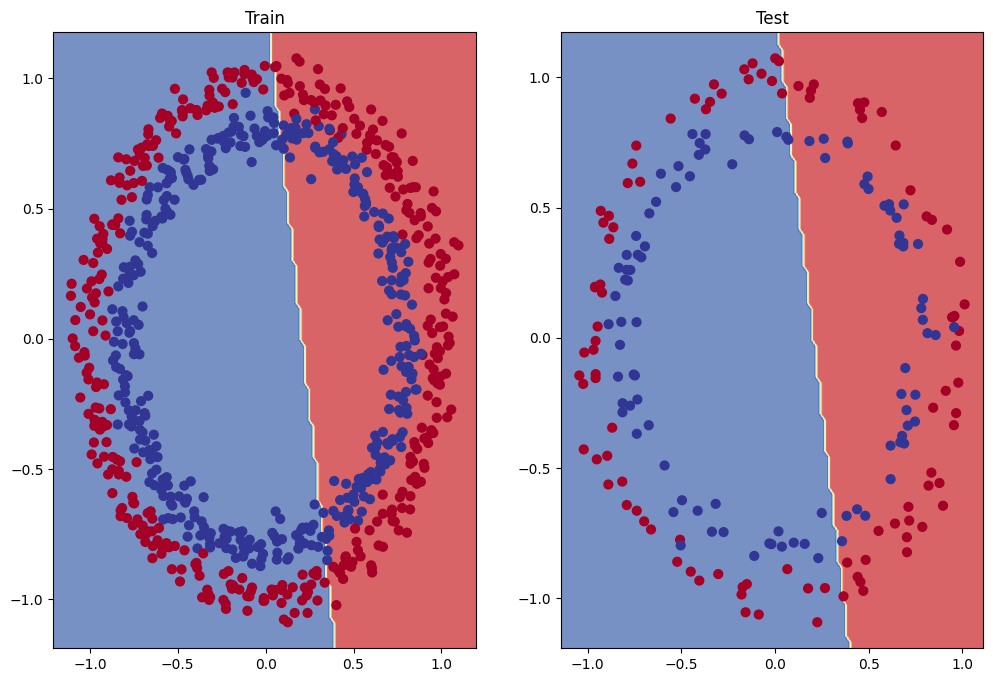

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,X_train,y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model,X_test,y_test)
plt.title("Test")

## To improve model performance-

1. increase neuron layers
2. Change optimizer / loss function
3. Change learning rate
4. Add activation function

In [ ]:
class newmodel(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # non-linear activation func

  def forward(self,x):
    z = self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    return z

In [ ]:
model_new = newmodel().to(device)
model_new

newmodel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
new_loss = nn.BCEWithLogitsLoss()
new_optim = torch.optim.Adagrad(params=model_new.parameters(),lr= 0.1,weight_decay= 0.001)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):

  model_new.train()

  y_log = model_new(X_train).squeeze(dim=1)
  y_pred = torch.round(torch.sigmoid(y_log))
  loss_n = new_loss(y_log,y_train)
  acc_n = accuracy_score(y_true=y_train, y_pred=y_pred)
  new_optim.zero_grad()
  loss_n.backward()
  new_optim.step()

  model_new.eval()
  with torch.inference_mode():

    test_log = model_new(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_log))

    test_loss = new_loss(test_log,y_test)
    test_acc = accuracy_score(y_true=y_test, y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"epoch no : {epoch} | Train loss : {loss_n:.5f} | accuracy : {acc_n:.2f}% | Test loss : {test_loss:.5f} | Test acc : {test_acc:.2f}%")


epoch no : 0 | Train loss : 0.69294 | accuracy : 50.38% | Test loss : 0.69213 | Test acc : 51.50%
epoch no : 100 | Train loss : 0.21354 | accuracy : 97.25% | Test loss : 0.21969 | Test acc : 95.50%
epoch no : 200 | Train loss : 0.12317 | accuracy : 98.12% | Test loss : 0.12824 | Test acc : 97.50%
epoch no : 300 | Train loss : 0.09515 | accuracy : 97.75% | Test loss : 0.10153 | Test acc : 97.50%
epoch no : 400 | Train loss : 0.08111 | accuracy : 98.12% | Test loss : 0.09526 | Test acc : 96.50%
epoch no : 500 | Train loss : 0.07293 | accuracy : 98.12% | Test loss : 0.09192 | Test acc : 97.00%
epoch no : 600 | Train loss : 0.06845 | accuracy : 98.12% | Test loss : 0.08890 | Test acc : 97.00%
epoch no : 700 | Train loss : 0.06546 | accuracy : 98.12% | Test loss : 0.08683 | Test acc : 97.00%
epoch no : 800 | Train loss : 0.06334 | accuracy : 98.00% | Test loss : 0.08533 | Test acc : 97.00%
epoch no : 900 | Train loss : 0.06165 | accuracy : 98.12% | Test loss : 0.08440 | Test acc : 97.50%


Text(0.5, 1.0, 'Test')

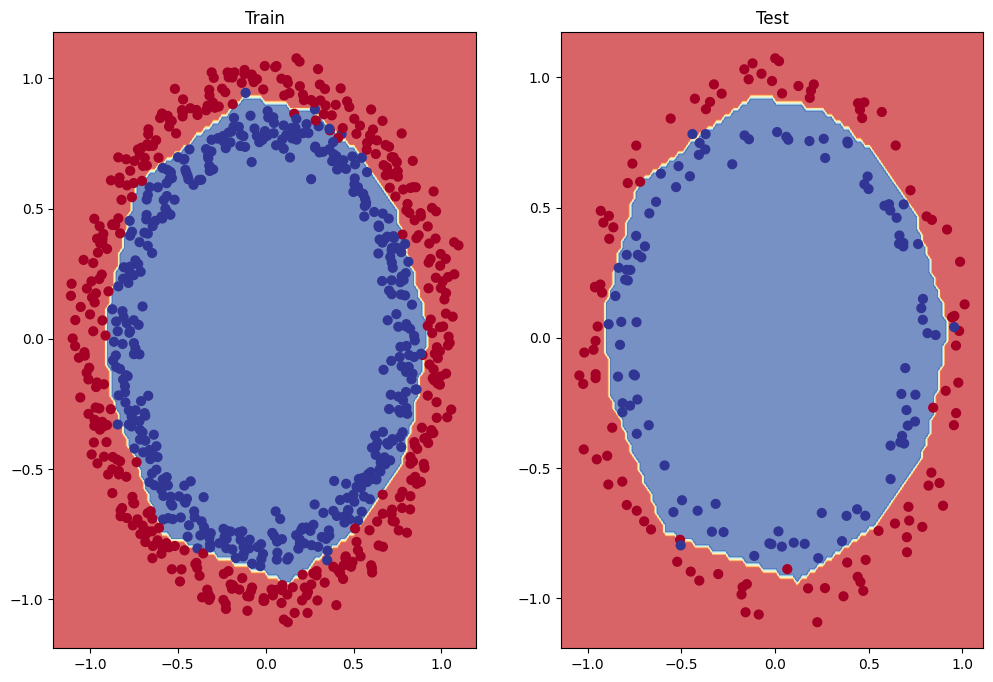

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_new,X_train,y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model_new,X_test,y_test)
plt.title("Test")